# Vehicle loan default predection

Importing necessary libs and custom functions

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image

#importing custom functions from functions.py file
from functions import dateconvert
from functions import yrscalc
from functions import time_diff_months

In [2]:
df = pd.read_csv(r'../Data/train.csv')

In [3]:
df = df.head(1000)
df.head(10)

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   
5    518279             54513       61900  89.66         67        22807   
6    529269             46349       61500  76.42         67        22807   
7    510278             43894       61900  71.89         67        22807   
8    490213             53713       61973  89.56         67        22807   
9    510980             52603       61300  86.95         67        22807   

   manufacturer_id  Current_pincode_ID Date.of.Birth Employment.Type  ...  \
0               45                1441      01-01-84        Salaried  ...   
1               45                1502      31-07-85   Self employed  ...   
2               45                1497      24-08-85   Self employed  ...   
3               45                1501      30-12-93   Self employed  ...   
4               45                1495      09-12-77   Self employed  ...   
5               45                1501      08-09-90   Self employed  ...   
6               45                1502      01-06-88        Salaried  ...   
7               45                1501      04-10-89        Salaried  ...   
8               45                1497      15-11-91   Self employed  ...   
9               45                1492      01-06-68        Salaried  ...   

  SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  PRIMARY.INSTAL.AMT  \
0                     0                     0                   0   
1                     0                     0                1991   
2                     0                     0                   0   
3                     0                     0                  31   
4                     0                     0                   0   
5                     0                     0                1347   
6                     0                     0                   0   
7                     0                     0                   0   
8                     0                     0                   0   
9                     0                     0                2608   

   SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   
5               0                             0   
6               0                             0   
7               0                             0   
8               0                             0   
9               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   
2                                    0         0yrs 0mon   
3                                    0         0yrs 8mon   
4                                    0         0yrs 0mon   
5                                    0         1yrs 9mon   
6                                    0         0yrs 0mon   
7                                    0         0yrs 2mon   
8                                    0         4yrs 8mon   
9                                    0         1yrs 7mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  loan_default  
0              0yrs 0mon                0             0  
1             1yrs 11mon                0             1  
2              0yrs 0mon                0             0  
3              1yrs 3mon                1             1  
4              0yrs 0mon                1    

In [4]:
#cleaning
df['Date.of.Birth'] = df['Date.of.Birth'].apply(dateconvert,delim='-')
df['DisbursalDate'] = df['DisbursalDate'].apply(dateconvert,delim='-')
df['Employment.Type'].fillna('Unknown',inplace=True)
df.head()

UniqueID  disbursed_amount  asset_cost    ltv  branch_id  supplier_id  \
0    420825             50578       58400  89.55         67        22807   
1    537409             47145       65550  73.23         67        22807   
2    417566             53278       61360  89.63         67        22807   
3    624493             57513       66113  88.48         67        22807   
4    539055             52378       60300  88.39         67        22807   

   manufacturer_id  Current_pincode_ID             Date.of.Birth  \
0               45                1441 1984-01-01 00:00:00+00:00   
1               45                1502 1985-07-31 00:00:00+00:00   
2               45                1497 1985-08-24 00:00:00+00:00   
3               45                1501 1993-12-30 00:00:00+00:00   
4               45                1495 1977-12-09 00:00:00+00:00   

  Employment.Type  ... SEC.SANCTIONED.AMOUNT  SEC.DISBURSED.AMOUNT  \
0        Salaried  ...                     0                     0   
1   Self employed  ...                     0                     0   
2   Self employed  ...                     0                     0   
3   Self employed  ...                     0                     0   
4   Self employed  ...                     0                     0   

   PRIMARY.INSTAL.AMT  SEC.INSTAL.AMT  NEW.ACCTS.IN.LAST.SIX.MONTHS  \
0                   0               0                             0   
1                1991               0                             0   
2                   0               0                             0   
3                  31               0                             0   
4                   0               0                             0   

   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  AVERAGE.ACCT.AGE  \
0                                    0         0yrs 0mon   
1                                    1        1yrs 11mon   
2                                    0         0yrs 0mon   
3                                    0         0yrs 8mon   
4                                    0         0yrs 0mon   

   CREDIT.HISTORY.LENGTH  NO.OF_INQUIRIES  loan_default  
0              0yrs 0mon                0             0  
1             1yrs 11mon                0             1  
2              0yrs 0mon                0             0  
3              1yrs 3mon                1             1  
4              0yrs 0mon                1             1  

[5 rows x 41 columns]

In [5]:
#Code for label
df['labels'] = df['loan_default'].apply(lambda x:'Paid' if x==0 else "default")

In [6]:
#imbalanced data
fig = px.pie(df, names='labels')
fig.show()

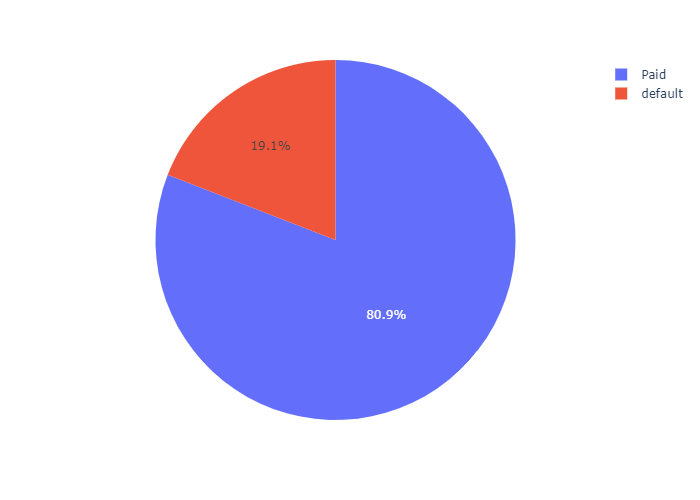

In [13]:
#Plot to be for non dynamic notebook render
fig.write_image(r"fig1.png")
img_bytes = fig.to_image(format="png")
Image(img_bytes)

In [7]:
#Feature engineering
emp_type = {'Unknown':0,'Self employed':1,'Salaried':2}

cns_desc = {'No Bureau History Available':0,
            'Not Scored: Sufficient History Not Available':0,
            'Not Scored: Not Enough Info available on the customer':0,
           'Not Scored: No Activity seen on the customer (Inactive)':0,
           'Not Scored: No Updates available in last 36 months':0,
           'Not Scored: Only a Guarantor':1,
           'Not Scored: More than 50 active Accounts found':1,
           'M-Very High Risk':2,
           'L-Very High Risk':3,
           'K-High Risk':4,
            'J-High Risk':5,
            'H-Medium Risk':6,
            'I-Medium Risk':7,
            'F-Low Risk':8,
            'E-Low Risk':9,
            'G-Low Risk':10,
            'C-Very Low Risk':11,
            'A-Very Low Risk':12,
            'D-Very Low Risk':13,
            'B-Very Low Risk':14
           }
df['Age'] = df['Date.of.Birth'].apply(time_diff_months)
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].apply(yrscalc)
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].apply(yrscalc)
df['Age.of.Loan'] = df['DisbursalDate'].apply(time_diff_months)
#combaining to sum of ids
df['No.of.Proofs'] = df[['Aadhar_flag','VoterID_flag','PAN_flag','Driving_flag','Passport_flag']].sum(axis=1)

In [8]:
df['PERFORM_CNS.SCORE.DESCRIPTION'] = df['PERFORM_CNS.SCORE.DESCRIPTION'].map(cns_desc)
df['Employment.Type'] = df['Employment.Type'].map(emp_type)


In [10]:
#df['No.of.ids'] = sum(df[['Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag','Passport_flag']])
X_train = df.drop(columns=['loan_default','labels','Date.of.Birth','DisbursalDate','Aadhar_flag','PAN_flag','VoterID_flag','Driving_flag','Passport_flag'])

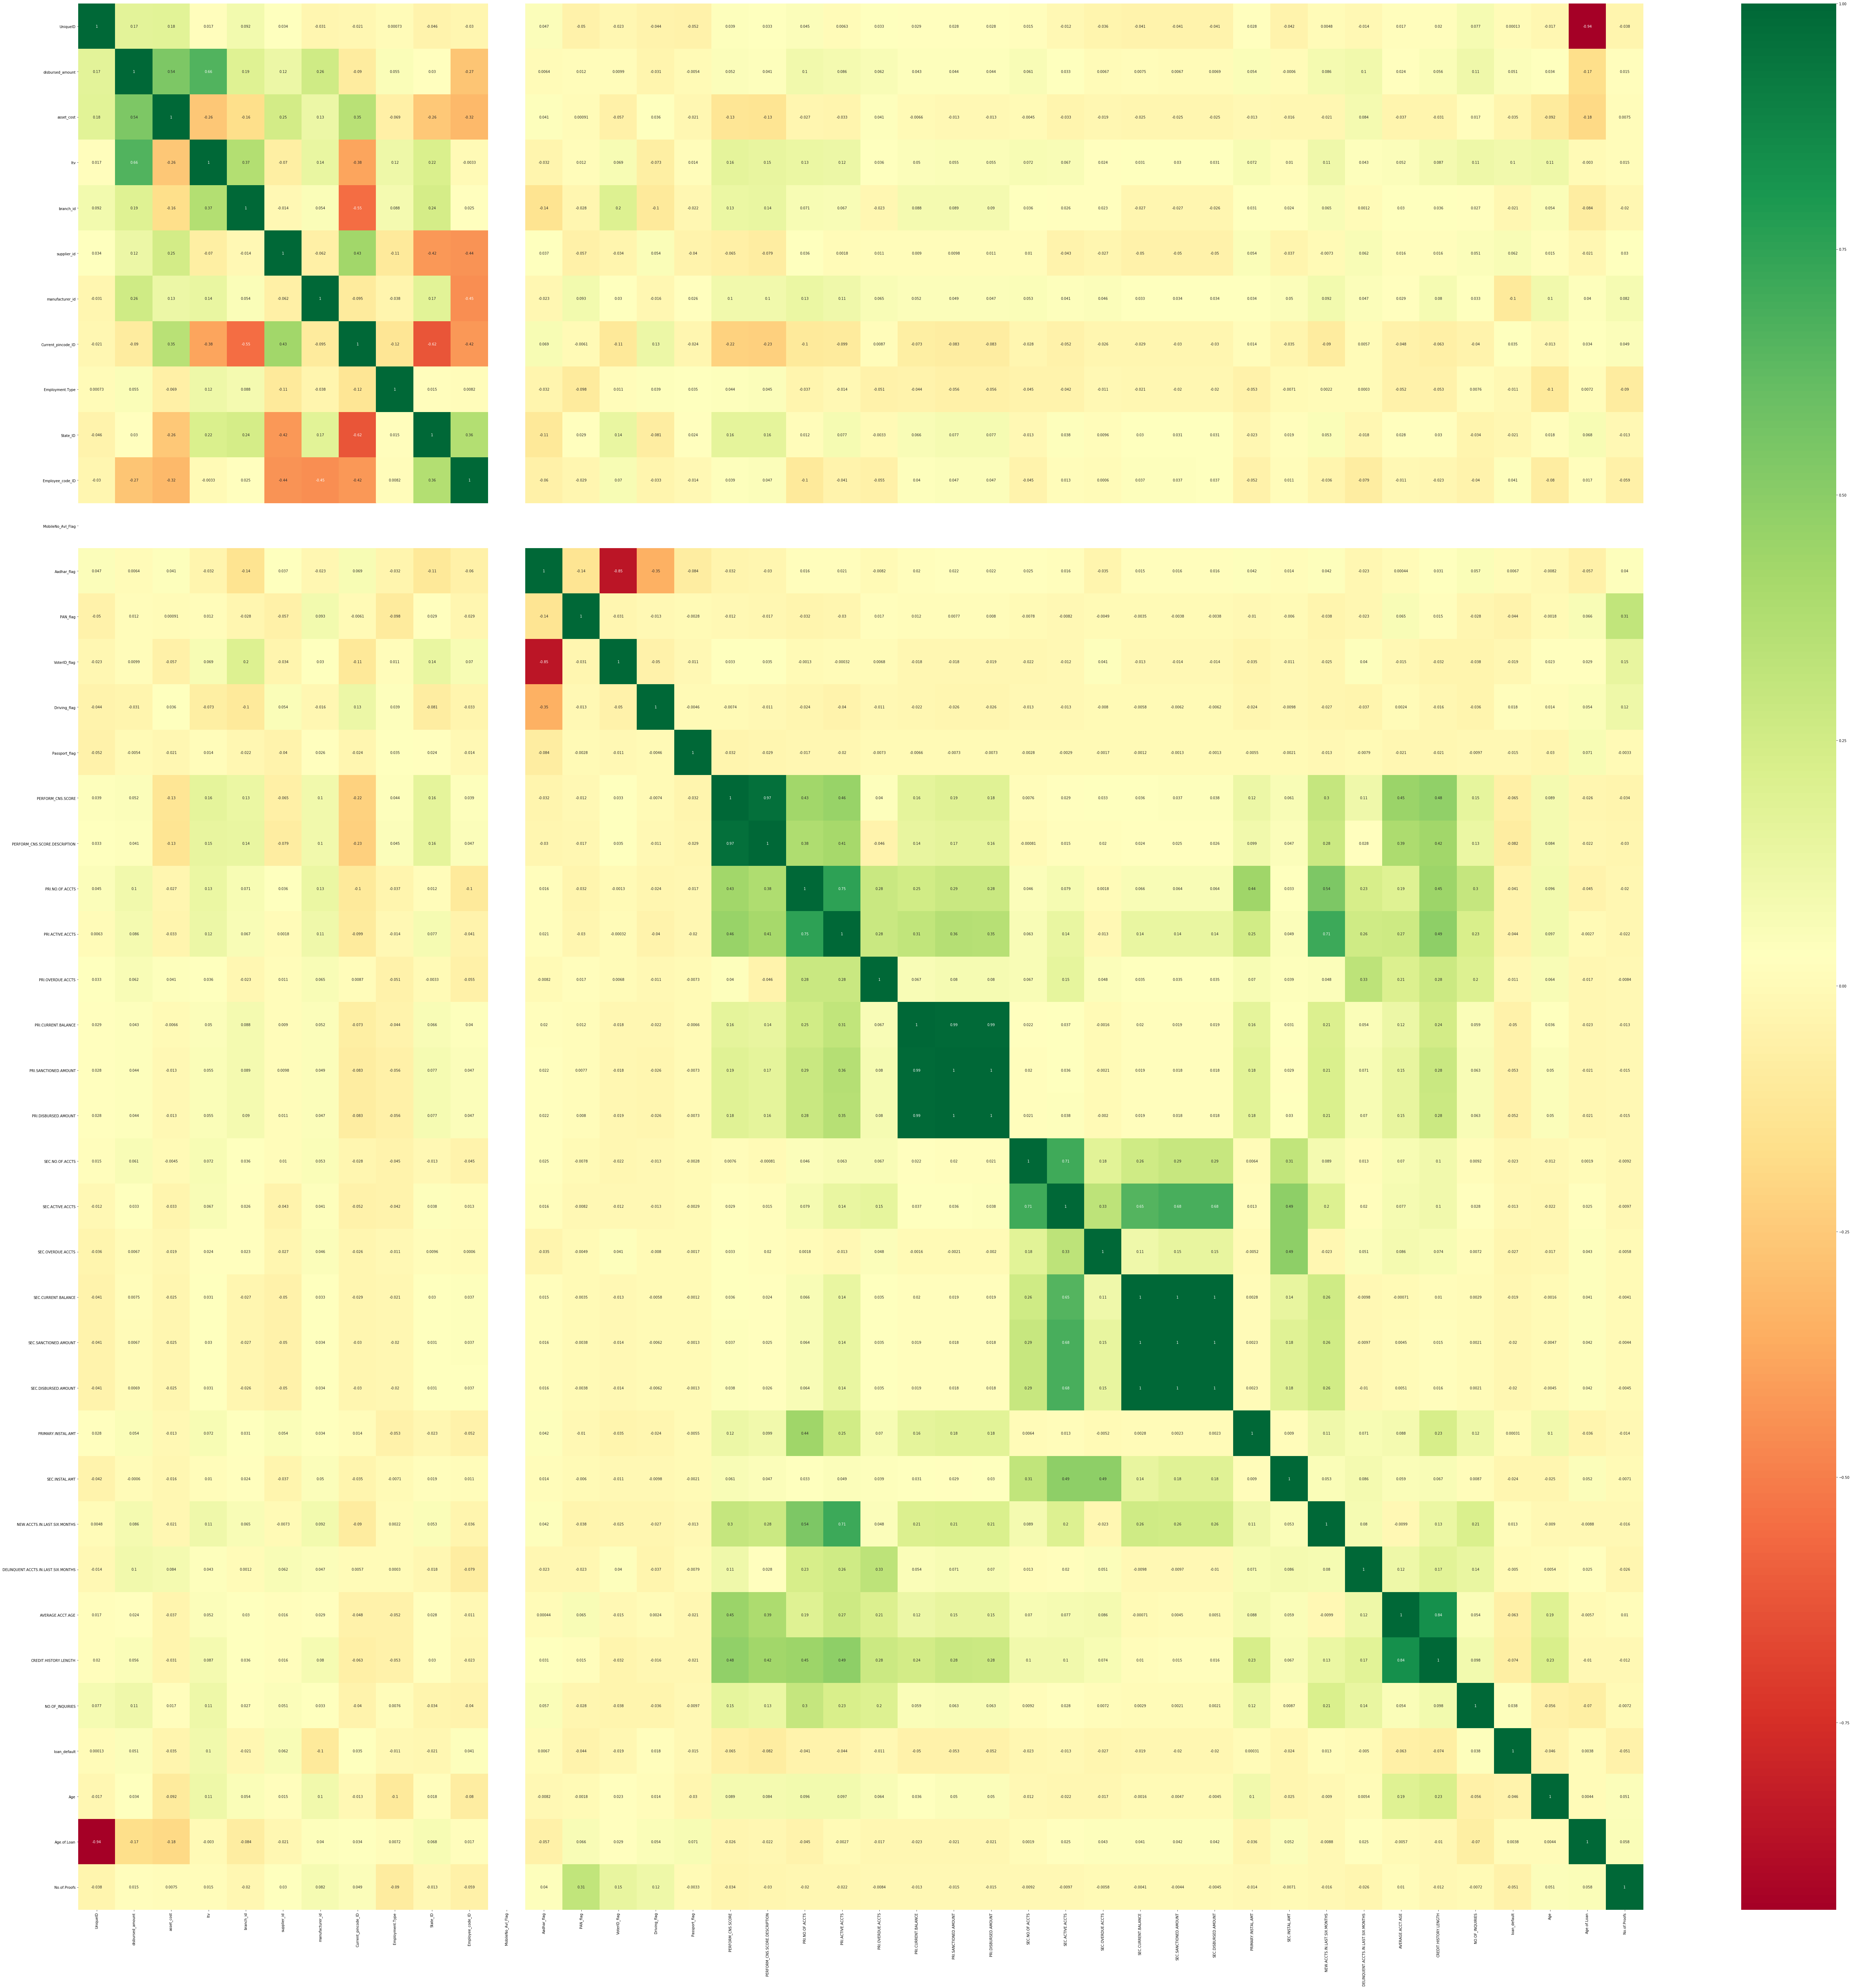

In [12]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(100,100))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype                          
---  ------                               --------------  -----                          
 0   UniqueID                             1000 non-null   int64                          
 1   disbursed_amount                     1000 non-null   int64                          
 2   asset_cost                           1000 non-null   int64                          
 3   ltv                                  1000 non-null   float64                        
 4   branch_id                            1000 non-null   int64                          
 5   supplier_id                          1000 non-null   int64                          
 6   manufacturer_id                      1000 non-null   int64                          
 7   Current_pincode_ID                   1000 non-null   int64                     